In [1]:
setwd(here::here())

In [2]:
library("Matrix")
library("tidyverse")
library("metacell")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.0
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()



ERROR: Error: package or namespace load failed for 'metacell' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'Rgraphviz'


In [ ]:
scdb_init("scrna_db_mm10_star/", force_reinit=T)
scfigs_init("figs/")

In [53]:
mat_name = "bmp4_ko"

In [54]:
plts_dir <- "/net/mraid14/export/tgdata/users/hernan/wd_NEW/plates.csv"
metadata = read.csv(file = plts_dir, stringsAsFactors = F)

plts_Bmp4_KO_Embryo <- grep(pattern = "4n_x", x = metadata$Plate, ignore.case = T, value = T)
plts_Bmp4_KO_Embryo_ExE <- grep(pattern = "germline", x = metadata$Plate, ignore.case = T, value = T)
metadata = metadata[(metadata$Plate %in% c(plts_Bmp4_KO_Embryo,plts_Bmp4_KO_Embryo_ExE)),]

excluded_plates = c("4n_x7_p4","4n_x7_p9","4n_x7_p10","4n_x7_p12")

metadata = metadata[!(metadata$Plate %in% excluded_plates),]
metadata$Amp.Batch.ID = metadata$Plate
metadata$Seq.Batch.ID = metadata$Sequencing.Dates
metadata$Batch.Set.ID = metadata$Amp.Batch.ID

print("The following plates are missing/not sequenced yet:")
print(metadata$Plate[!(paste0(metadata$Plate,".txt") %in% list.files("/net/mraid14/export/tgdata/db/tgdb/mars_runs/stelzer_star/plates/umis/"))])

metadata$Amp.Batch.ID = metadata$Plate
metadata$Seq.Batch.ID = metadata$Sequencing.Dates
metadata$Batch.Set.ID = metadata$Amp.Batch.ID

write.table(x = metadata,file = paste("config/key_",mat_name,".txt",sep = ""),quote = F,sep = "\t",row.names = F)

[1] "The following plates are missing/not sequenced yet:"
character(0)


In [55]:
mcell_import_multi_mars(mat_nm = mat_name,
                        dataset_table_fn = paste("config/key_",mat_name,".txt",sep = ""),
                        base_dir = "/net/mraid14/export/tgdata/db/tgdb/mars_runs/stelzer_star/plates/umis/",
                        patch_cell_name=T,
                        force=TRUE)

will read germline_x4_p1

will read germline_x4_p2

will read germline_x4_p3

will read germline_x4_p4

will read germline_x4_p5

will read germline_x4_p6

will read germline_x4_p7

will read germline_x4_p8

will read germline_x4_p9

will read germline_x4_p10

will read germline_x4_p14

will read germline_x4_p15

will read germline_x4_p16

will read germline_x4_p11

will read germline_x4_p12

will read germline_x4_p13

will read 4n_x7_p1

will read 4n_x7_p2

will read 4n_x7_p3

will read 4n_x7_p5

will read 4n_x7_p6

will read 4n_x7_p7

will read 4n_x7_p8

will read 4n_x7_p11

will read 4n_x7_p13

will read 4n_x7_p14

will read 4n_x7_p15

will read 4n_x7_p16

will read 4n_x7_p17

will read 4n_x8_p1

will read 4n_x8_p2

will read 4n_x8_p3

will read 4n_x8_p4

will read 4n_x8_p5

will read 4n_x8_p6

will read 4n_x8_p7

will read 4n_x9_p3

will read 4n_x10_p1

will read 4n_x10_p2

will read 4n_x10_p3

will read 4n_x10_p4

will read 4n_x10_p5

will read 4n_x10_p6

will read 4n_x10_p7

will

[1] TRUE

In [56]:
mat = scdb_mat(mat_name)

In [57]:
mc2_db_dir = "mc2"

In [59]:
duplicate_cells = read.table(file = "mc2/bmp4_ko_duplicate_cells.tsv",sep = '\t',h = T)$x
head(duplicate_cells)
f = colnames(mat@mat) %in% duplicate_cells

# # 1. Write the umi matrix into h5ad format (I cleaned the matrix first using MC1, but MC2 can also clean it). This is horribly inefficient (writing 2 files to disk) but I lost myself in scanpy documentation and didn't bother solving it yet.
h5ad_fn = paste(mc2_db_dir , "/bmp4_ko_cells.h5ad", sep="")
out_h5ad <- anndata::AnnData(
  X = t(mat@mat[,!f]) # obs = md_data_frame for passing metadata
)



[1] "4n_x10_p19185" "4n_x10_p8001"  "4n_x10_p8002"  "4n_x10_p8003" 
[5] "4n_x10_p8004"  "4n_x10_p8005"

In [60]:
library("reticulate")
library("anndata")
sc = import("scanpy")
mc2 = import("metacells")

In [61]:
mat = scdb_mat(mat_name)
nms = c(rownames(mat@mat), rownames(mat@ignore_gmat))
bad_genes = c(grep("ERCC", nms,v=T),"Neat1", "Xist", "Malat1", "AK140265","AK018753","AK163440","DQ539915","AK131586","AK131579","AK142750","X57780","GU332589","BC071253")

mat = scm_ignore_genes(scmat = mat,ig_genes = bad_genes)
message("The following genes were ignored")
print(bad_genes)

The following genes were ignored



  [1] "ERCC-00002" "ERCC-00003" "ERCC-00004" "ERCC-00009" "ERCC-00012"
  [6] "ERCC-00013" "ERCC-00014" "ERCC-00016" "ERCC-00017" "ERCC-00019"
 [11] "ERCC-00022" "ERCC-00024" "ERCC-00025" "ERCC-00028" "ERCC-00031"
 [16] "ERCC-00033" "ERCC-00034" "ERCC-00035" "ERCC-00039" "ERCC-00040"
 [21] "ERCC-00041" "ERCC-00042" "ERCC-00043" "ERCC-00044" "ERCC-00046"
 [26] "ERCC-00048" "ERCC-00051" "ERCC-00053" "ERCC-00054" "ERCC-00057"
 [31] "ERCC-00058" "ERCC-00059" "ERCC-00060" "ERCC-00061" "ERCC-00062"
 [36] "ERCC-00067" "ERCC-00069" "ERCC-00071" "ERCC-00073" "ERCC-00074"
 [41] "ERCC-00075" "ERCC-00076" "ERCC-00077" "ERCC-00078" "ERCC-00079"
 [46] "ERCC-00081" "ERCC-00083" "ERCC-00084" "ERCC-00085" "ERCC-00086"
 [51] "ERCC-00092" "ERCC-00095" "ERCC-00096" "ERCC-00097" "ERCC-00098"
 [56] "ERCC-00099" "ERCC-00104" "ERCC-00108" "ERCC-00109" "ERCC-00111"
 [61] "ERCC-00112" "ERCC-00113" "ERCC-00116" "ERCC-00117" "ERCC-00120"
 [66] "ERCC-00123" "ERCC-00126" "ERCC-00130" "ERCC-00131" "ERCC-00134"
 [71] 

8320 cells with <1500 UMIs

585 cells with >20000 UMIs



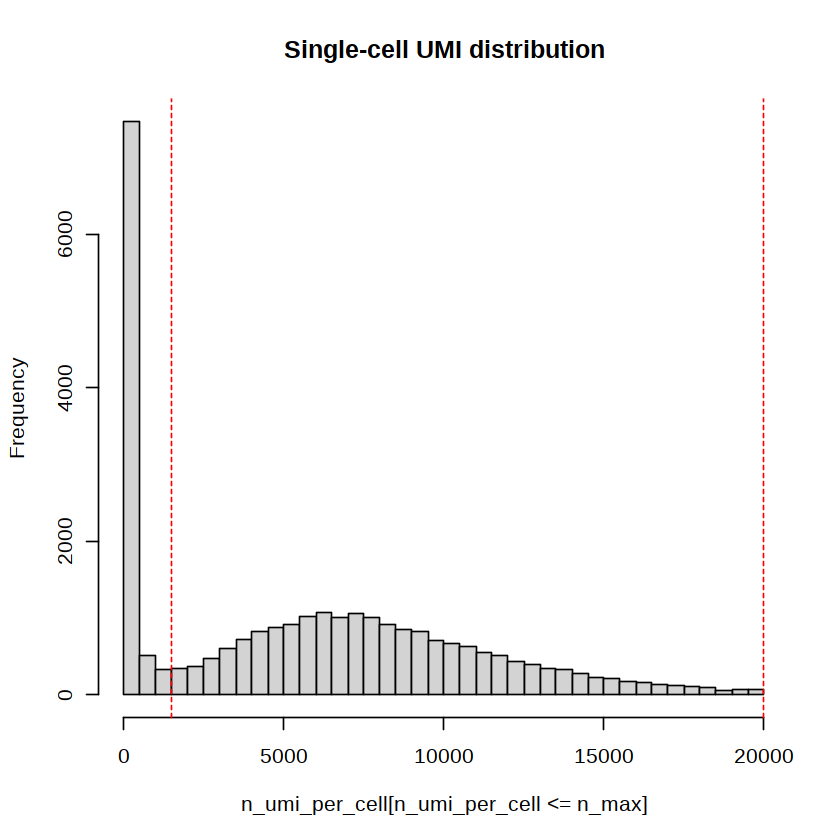

In [62]:
n_umi_per_cell = colSums(mat@mat)
n_min = 1500
n_max = 20000
hist(n_umi_per_cell[n_umi_per_cell <= n_max],breaks = seq(0,n_max,length.out = 41), main = "Single-cell UMI distribution")
abline(v = n_min,col = "red",lty = "dashed")
abline(v = n_max,col = "red",lty = "dashed")
message(paste0(sum(n_umi_per_cell < n_min), " cells with <",n_min," UMIs"))
message(paste0(sum(n_umi_per_cell > n_max), " cells with >",n_max," UMIs"))

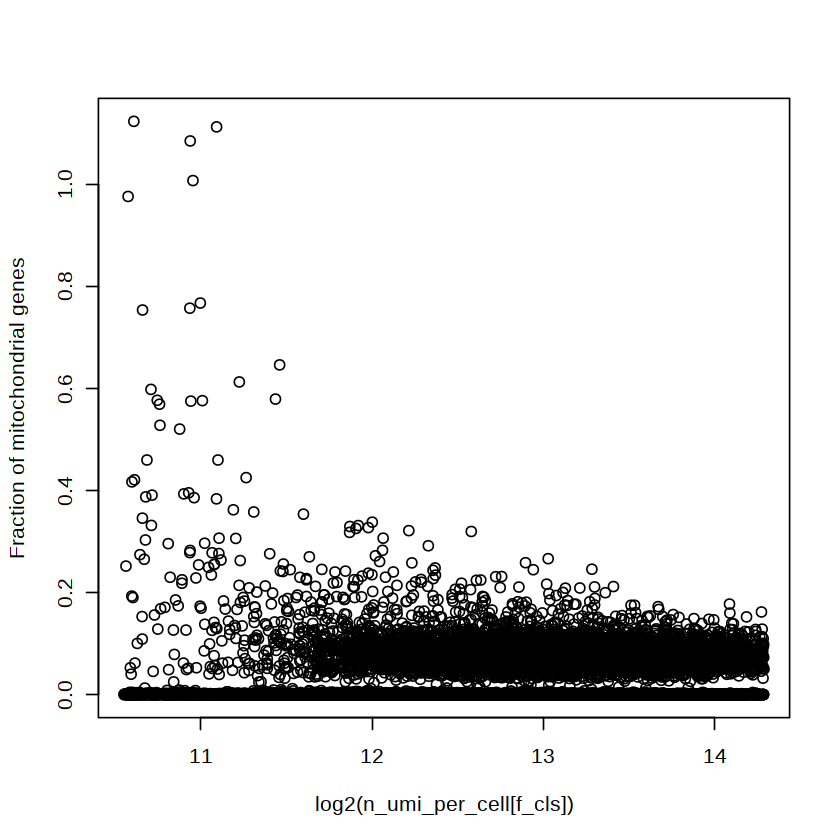

[1] 131

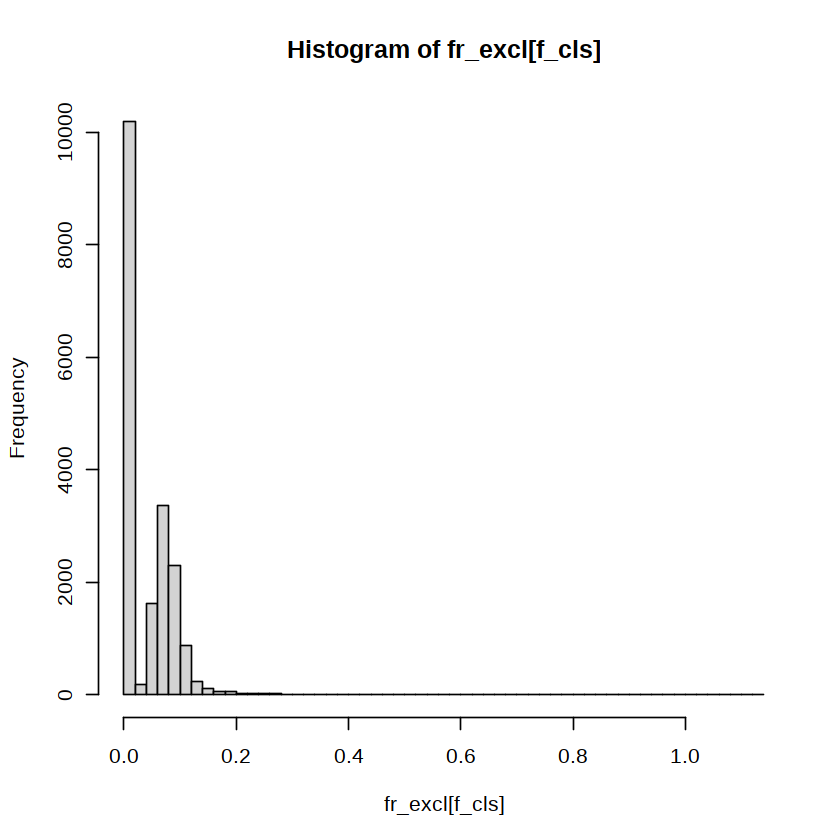

In [63]:
small_cells = colnames(mat@mat)[n_umi_per_cell < n_min]
large_cells = colnames(mat@mat)[n_umi_per_cell > n_max]

f_cls = n_umi_per_cell <= n_max & n_umi_per_cell >= n_min

fr_excl = colSums(mat@ignore_gmat)/colSums(mat@mat)

plot(x = log2(n_umi_per_cell[f_cls]),y = fr_excl[f_cls],ylab = "Fraction of mitochondrial genes")
hist(fr_excl[f_cls],breaks = 50)

sum(fr_excl[f_cls] > 0.2)

In [64]:
cells_large_fr = colnames(mat@mat)[fr_excl > 0.2]

mat = scm_ignore_cells(scmat = mat,ig_cells = unique(c(small_cells,large_cells,cells_large_fr)))
message(paste0("excluded ",length(unique(c(small_cells,large_cells,cells_large_fr)))," cells"))

excluded 9036 cells



In [65]:
files_with_metadata = list.files(path = "/net/mraid14/export/tgdata/db/tgdb/mars_runs/stelzer_star/plates/metadata/")

files_with_metadata = intersect(files_with_metadata,paste(metadata$Plate,".tsv",sep=""))
files_with_metadata

extra_cell_metadata = data.frame()

for (plate_id in files_with_metadata) {
  print(plate_id)
  extra_cell_metadata_temp = read.table(paste("/net/mraid14/export/tgdata/db/tgdb/mars_runs/stelzer_star/plates/metadata/",plate_id,sep = ""),
                                        sep = "\t",h = T,stringsAsFactors = F)
  colnames(extra_cell_metadata_temp)[colnames(extra_cell_metadata_temp) == "dtomato_a"] = "tdtomato_a"
  #extra_cell_metadata = rbind(extra_cell_metadata,extra_cell_metadata_temp,fill = TRUE)
  extra_cell_metadata = bind_rows(extra_cell_metadata,extra_cell_metadata_temp)
}

#Next I remove the duplicate cells
duplicate_cells = names(table(extra_cell_metadata$cell)[table(extra_cell_metadata$cell) >1])
tot_number_of_duplicates = sum(table(extra_cell_metadata$cell)[table(extra_cell_metadata$cell) >1]) - length(duplicate_cells)

message(tot_number_of_duplicates," wells with duplicated cells")

for (cell_id in duplicate_cells) {
  duplicates = which(extra_cell_metadata$cell == cell_id)
  # remove the first element from the duplicate list
  duplicates = duplicates[-1]
  extra_cell_metadata = extra_cell_metadata[-duplicates,]
}

# Next add metadata to matrix
extra_cell_metadata$cell = paste(extra_cell_metadata$plate,extra_cell_metadata$cell,sep=".")

temp = mat@cell_metadata
temp$cell = rownames(temp)
col_f = setdiff(colnames(temp),setdiff(colnames(extra_cell_metadata),c("cell")))
temp = temp[,col_f]



#temp$cell = names(temp$Plate)
temp = left_join(temp,extra_cell_metadata,by="cell")
rownames(temp) = temp$cell

message("In total ",sum(is.na(temp$embryo)), " nonannotated wells")
table(as.character(mat@cell_metadata$Plate[is.na(temp$embryo)]))

cls_f = temp$cell[!is.na(temp$embryo)]
f = temp[cls_f,"embryo"] == ""
temp[cls_f[f],"embryo"] = "empty"

[1] "4n_x10_p1.tsv"       "4n_x10_p10.tsv"      "4n_x10_p11.tsv"     
 [4] "4n_x10_p12.tsv"      "4n_x10_p13.tsv"      "4n_x10_p14.tsv"     
 [7] "4n_x10_p15.tsv"      "4n_x10_p16.tsv"      "4n_x10_p17.tsv"     
[10] "4n_x10_p18.tsv"      "4n_x10_p19.tsv"      "4n_x10_p2.tsv"      
[13] "4n_x10_p20.tsv"      "4n_x10_p21.tsv"      "4n_x10_p22.tsv"     
[16] "4n_x10_p23.tsv"      "4n_x10_p24.tsv"      "4n_x10_p25.tsv"     
[19] "4n_x10_p26.tsv"      "4n_x10_p3.tsv"       "4n_x10_p4.tsv"      
[22] "4n_x10_p5.tsv"       "4n_x10_p6.tsv"       "4n_x10_p7.tsv"      
[25] "4n_x10_p8.tsv"       "4n_x7_p1.tsv"        "4n_x7_p11.tsv"      
[28] "4n_x7_p13.tsv"       "4n_x7_p14.tsv"       "4n_x7_p15.tsv"      
[31] "4n_x7_p16.tsv"       "4n_x7_p17.tsv"       "4n_x7_p2.tsv"       
[34] "4n_x7_p3.tsv"        "4n_x7_p5.tsv"        "4n_x7_p6.tsv"       
[37] "4n_x7_p7.tsv"        "4n_x7_p8.tsv"        "4n_x8_p1.tsv"       
[40] "4n_x8_p2.tsv"        "4n_x8_p3.tsv"        "4n_x8_p4.tsv"       
[43] "4n_x8_p5.tsv"        "4n_x8_p6.tsv"        "4n_x8_p7.tsv"       
[46] "4n_x9_p1.tsv"        "4n_x9_p3.tsv"        "germline_x4_p1.tsv" 
[49] "germline_x4_p10.tsv" "germline_x4_p11.tsv" "germline_x4_p12.tsv"
[52] "germline_x4_p13.tsv" "germline_x4_p14.tsv" "germline_x4_p15.tsv"
[55] "germline_x4_p16.tsv" "germline_x4_p2.tsv"  "germline_x4_p3.tsv" 
[58] "germline_x4_p4.tsv"  "germline_x4_p5.tsv"  "germline_x4_p6.tsv" 
[61] "germline_x4_p7.tsv"  "germline_x4_p8.tsv"  "germline_x4_p9.tsv" 
[64] "germline_x6_p1.tsv"  "germline_x6_p10.tsv" "germline_x6_p11.tsv"
[67] "germline_x6_p2.tsv"  "germline_x6_p3.tsv"  "germline_x6_p4.tsv" 
[70] "germline_x6_p5.tsv"  "germline_x6_p7.tsv"  "germline_x6_p8.tsv" 
[73] "germline_x6_p9.tsv"

[1] "4n_x10_p1.tsv"
[1] "4n_x10_p10.tsv"
[1] "4n_x10_p11.tsv"
[1] "4n_x10_p12.tsv"
[1] "4n_x10_p13.tsv"
[1] "4n_x10_p14.tsv"
[1] "4n_x10_p15.tsv"
[1] "4n_x10_p16.tsv"
[1] "4n_x10_p17.tsv"
[1] "4n_x10_p18.tsv"
[1] "4n_x10_p19.tsv"
[1] "4n_x10_p2.tsv"
[1] "4n_x10_p20.tsv"
[1] "4n_x10_p21.tsv"
[1] "4n_x10_p22.tsv"
[1] "4n_x10_p23.tsv"
[1] "4n_x10_p24.tsv"
[1] "4n_x10_p25.tsv"
[1] "4n_x10_p26.tsv"
[1] "4n_x10_p3.tsv"
[1] "4n_x10_p4.tsv"
[1] "4n_x10_p5.tsv"
[1] "4n_x10_p6.tsv"
[1] "4n_x10_p7.tsv"
[1] "4n_x10_p8.tsv"
[1] "4n_x7_p1.tsv"
[1] "4n_x7_p11.tsv"
[1] "4n_x7_p13.tsv"
[1] "4n_x7_p14.tsv"
[1] "4n_x7_p15.tsv"
[1] "4n_x7_p16.tsv"
[1] "4n_x7_p17.tsv"
[1] "4n_x7_p2.tsv"
[1] "4n_x7_p3.tsv"
[1] "4n_x7_p5.tsv"
[1] "4n_x7_p6.tsv"
[1] "4n_x7_p7.tsv"
[1] "4n_x7_p8.tsv"
[1] "4n_x8_p1.tsv"
[1] "4n_x8_p2.tsv"
[1] "4n_x8_p3.tsv"
[1] "4n_x8_p4.tsv"
[1] "4n_x8_p5.tsv"
[1] "4n_x8_p6.tsv"
[1] "4n_x8_p7.tsv"
[1] "4n_x9_p1.tsv"
[1] "4n_x9_p3.tsv"
[1] "germline_x4_p1.tsv"
[1] "germline_x4_p10.tsv"
[1] "ger

418 wells with duplicated cells

In total 0 nonannotated wells



< table of extent 0 >

In [66]:
mat@cell_metadata = temp

#cells_ignore_embryos = colnames(mat@mat)[mat@cell_metadata[colnames(mat@mat),"embryo"] %in% ignore_embryos]

new_ignore_cells = union(mat@ignore_cells,rownames(mat@cell_metadata)[mat@cell_metadata[,"embryo"]== "empty"])
new_ignore_cells = union(new_ignore_cells,duplicate_cells)
#new_ignore_cells = union(new_ignore_cells,cells_ignore_embryos)
mat = scm_ignore_cells(scmat = mat,ig_cells = new_ignore_cells)

In [67]:
#### Add the old metadata

In [68]:
scdb_init("scrna_db/",force_reinit = T)

initializing scdb to scrna_db/



In [69]:
mat_old_1 = scdb_mat("Bmp4_KO_embexe")
mat_old_2 = scdb_mat("Bmp4_KO_emb")

In [70]:
md_1 = mat_old_1@cell_metadata
md_2 = mat_old_2@cell_metadata

In [71]:
nrow(md_1) + nrow(md_2)

[1] 28032

In [72]:
md_all_old = bind_rows(md_1,md_2)
rownames(md_all_old) = md_all_old$cell

In [73]:
md_all_old = md_all_old[mat@cell_metadata$cell,]

In [74]:
mat@cell_metadata = md_all_old

In [75]:
sum(md_all_old$cell != mat@cell_metadata$cell)

[1] 0

In [76]:
scdb_init("scrna_db_mm10_star/",force_reinit = T)

initializing scdb to scrna_db_mm10_star/



In [77]:
scdb_add_mat(id = mat_name,mat = mat)

In [47]:
#write.table(x = duplicate_cells,file = "mc2/duplicate_cells.tsv",sep = '\t')

#f = colnames(mat@mat) %in% duplicate_cells
# # 1. Write the umi matrix into h5ad format (I cleaned the matrix first using MC1, but MC2 can also clean it). This is horribly inefficient (writing 2 files to disk) but I lost myself in scanpy documentation and didn't bother solving it yet.

In [78]:
sc$write(adata = out_h5ad, filename = h5ad_fn)